<a href="https://colab.research.google.com/github/WuilsonEstacio/Finanzas-con-Python/blob/main/Finanzas_con_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For finances

In [ ]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import scipy
from scipy.stats import skew, kurtosis, chi2
import seaborn as sns # importando seaborn

# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy import stats # importando scipy.stats
import seaborn as sns # importando seaborn

In [ ]:
# input params
x_size = 10**6    # tamaño de la distrubucion
dregees_freedom = 2 # for student distribution. 750 is borderline
type_random_variable = 'normal' # o 'exponential' ,  'student' , ' normal ', ' chi-cuadrado '

# playing with borel-cantelli: P[all tests are normal = True] = 0 para quitar comentarios es ctrl+1
#para poner comentarios es shit+tab
# counter = 0
# x_is_normal = Truel
# while x_is_normal:
#     counter += 1 

In [ ]:
#computer random vector
df = dregees_freedom
if type_random_variable == 'normal':
  x = np.random.standard_normal(size=x_size)
  x_str = 'Standard Normal RV'
elif type_random_variable == 'exponential':
  x = np.random.standard_exponential(size=x_size)
  x_str = 'Exponential RV'
elif type_random_variable == 'student':
  x = np.random.standard_t(size=x_size, df=dregees_freedom, )
  x_str = 'Student RV (df = '+ str(dregees_freedom) + ')'
elif type_random_variable == 'chi-cuadrado':
  chi2 = stats.chi2(dregees_freedom)
  x = np.random.chisquare(size=x_size, df=dregees_freedom, )
  x_str = 'chi-cuadrado (df = '+ str(dregees_freedom) + ')'
print(x)
print(df)


[-0.40546659  1.67107159 -0.09900013 ... -0.35691169 -0.23801116
  1.00425527]
2


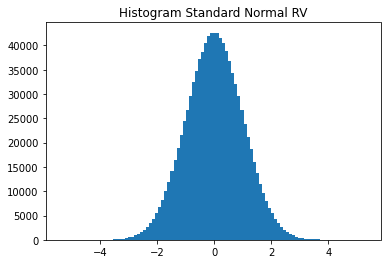

In [ ]:
# plot histogram
plt.figure()
plt.hist(x,bins=100) # bins genera mas cuadritos
plt.title('Histogram ' +  x_str)
plt.show()

In [ ]:
round_digits = 4
x_mean = np.mean(x) # para calcular la  media
x_std =np.std(x) # para la desviacion estandar o volatilidad si se habla de mercados
x_skew = skew(x) # para calcular la skweness o simetria
x_kurt = kurtosis(x) # curtosis en exceso, para calcular la kurtosis y ver que tantas colas largas tiene
x_sharpe = x_mean/x_std # esto es el rendimiento en unidades de riesgo
print('media               =', x_mean)
print('desviacion estandar =', x_std)
print('skweness            =', x_skew)
print('kurtosis            =', x_kurt) # curtosis en exceso si es cero
print('x_sharpe            =', x_sharpe)

media               = 0.0005243547149688064
desviacion estandar = 0.9995579065269103
skweness            = -0.0005680220333444958
kurtosis            = 0.009066489205819206
x_sharpe            = 0.0005245866312945718


In [ ]:
x_var_95 = np.percentile(x,95) # valor en riesgo esto nos dice que solamente el 5% de los valores son mayores, el valor arrojado en este caso mayores a 1.64
x_cvar_95 = np.mean(x[x <= x_var_95]) # valor en riesgo condicional, esto nos dice, que cuando pierdo que tanto pierdo, esto es el promedio de todos os valores que estan a la isquierda osea que se encuentran en el -5% en este caso
x_sharpe = x_mean / x_std * np.sqrt(252) #
print('percentil del 95% o valor en riesgo   =', x_var_95) #
print('covarianza del 95%, riesgo condicional =', x_cvar_95)
print('x_sharpe            =', x_sharpe)

percentil del 95% o valor en riesgo   = 1.6434451272541355
covarianza del 95%, riesgo condicional = -0.10806322193944358
x_sharpe            = 0.008327554605087422


In [ ]:
x_corrcoef = np.corrcoef(x) # coeficiente de correlacion
x_var = np.var(x) # covarianza
print('Coeficiente de correlacion  =', x_corrcoef)
print('varianza                    =', x_var)

Coeficiente de correlacion  = 1.0
varianza                    = 0.9991160085004596


In [ ]:
#test de jarque-bera
# https://es.wikipedia.org/wiki/Test_de_Jarque-Bera
jb = x_size/6 * (x_skew**2 + 1/4*x_kurt**2) # jarque bera
print('jarque bera            =', jb) # si se tiene un jarque bera > 6 la distribucion no es normal


jarque bera            = 3.4788259433623097


In [ ]:
# p-value print('jarque bera  =', x_jarque_bera) https://en.wikipedia.org/wiki/P-value  
# esto me da la probabilidad de que suponiendo que tenga una distribicion chi2, cua es la probabilidad
# de tener puntos que caigan a la izquierda de dicho valor
p_value = 1 - chi2.cdf(jb, df) # se deben fijar df en 2 para la t-student, df= grados de liberdad 
print('p_value           =', p_value)

p_value           = 0.17562346631097492


In [ ]:
# esto nos dice que si nuestro p_value es mayor que 0.05 o 5% aceptamos la hipotesis porque estariamos a la izquierda de nuestro humbral
# y nuestra distribucion tiende a ser normal ver:  https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test
is_normal = (p_value > 0.05) # con esto necesitamos que equivalently jb < 6
print('is_normal           =', is_normal) 

#print('counter' + str(counter))
#print('------')

is_normal           = True
